# **Import The Libraries**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_excel("temp (1).xlsx")
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625


# **EDA**

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10683 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


<Axes: >

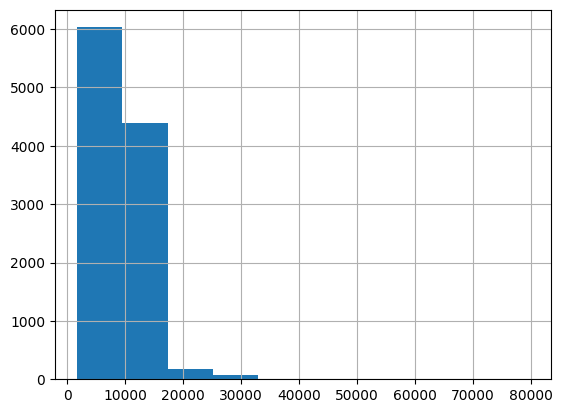

In [11]:
# Distribution of Prices

data['Price'].hist()

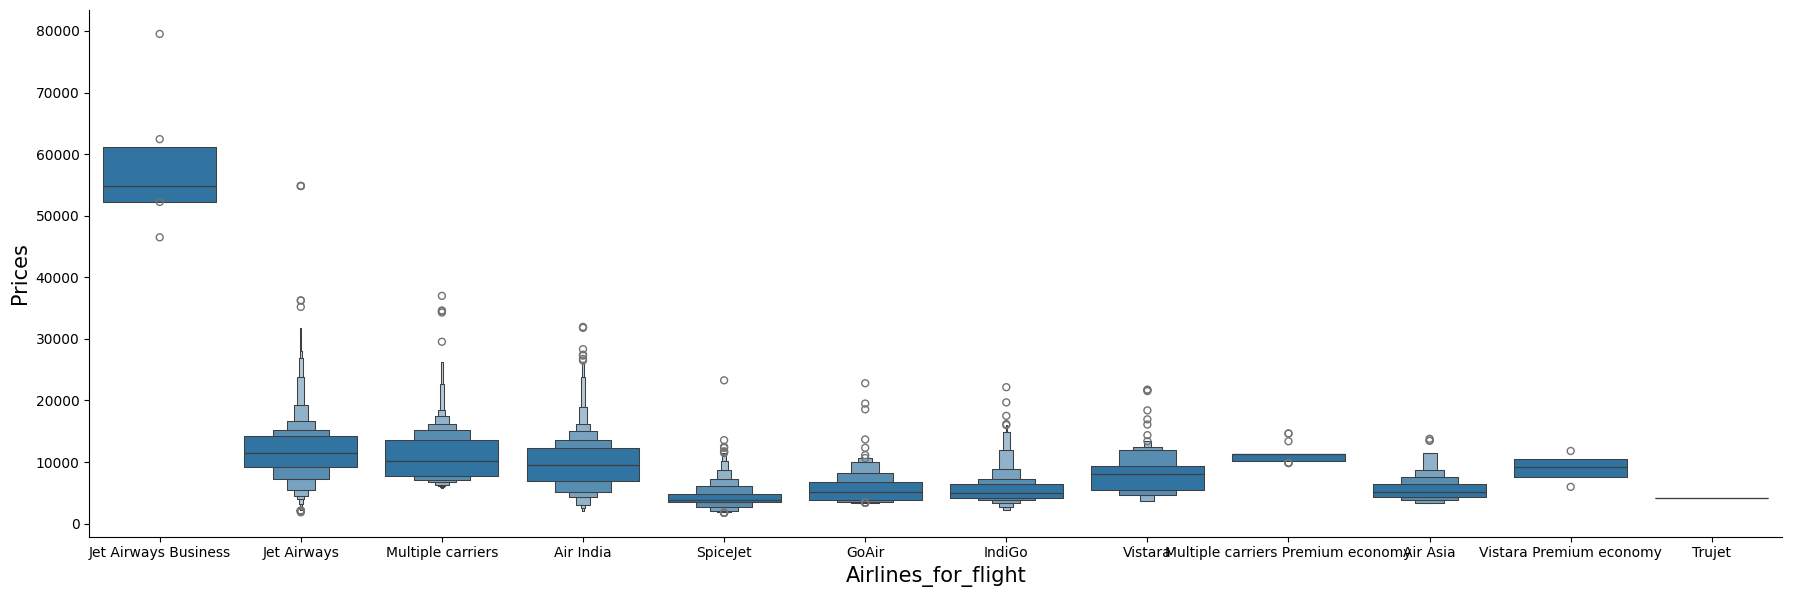

In [12]:
# Airline vs Price

sns.catplot(y = 'Price', x = 'Airline', data = data.sort_values('Price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airlines_for_flight',size=15)
plt.ylabel('Prices',size=15)
plt.show()

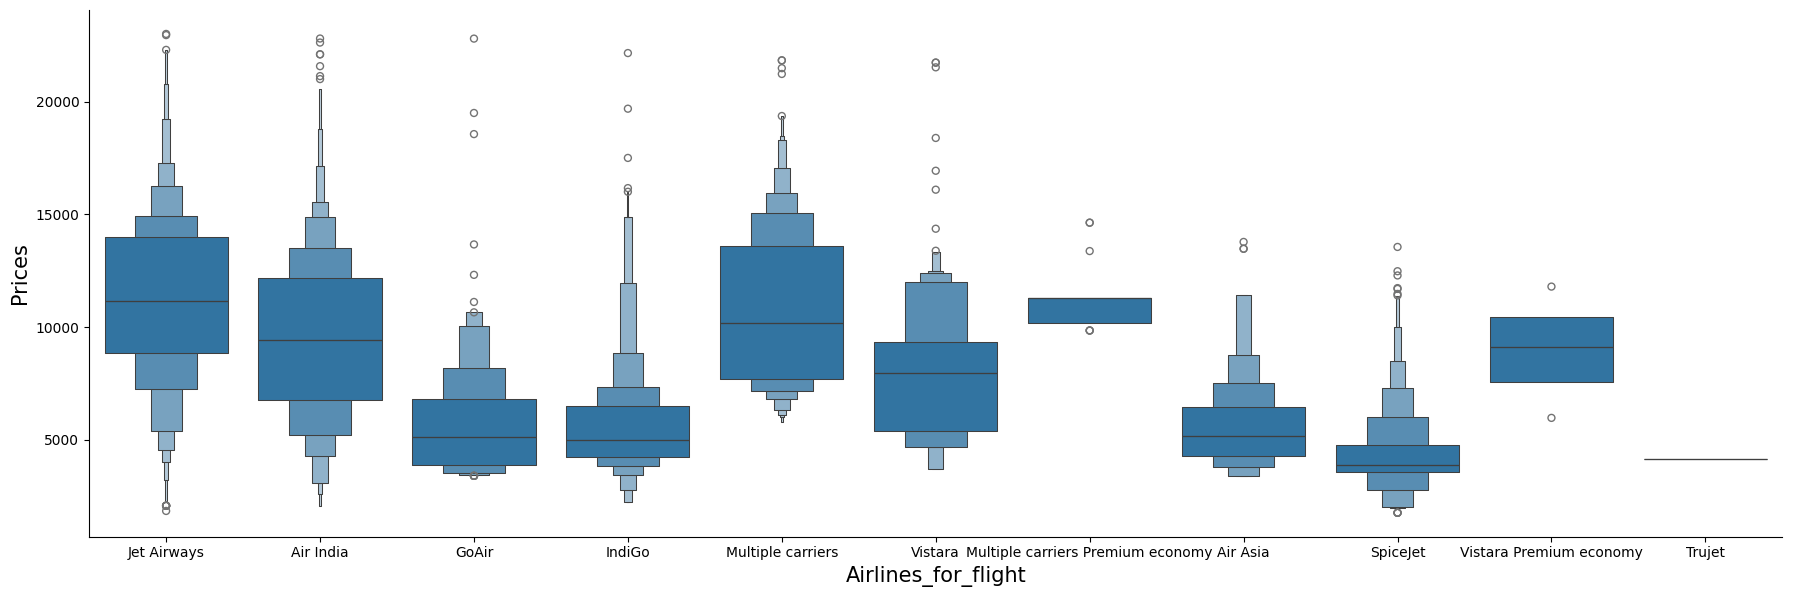

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

# Create the plot without outliers
sns.catplot(y = 'Price', x = 'Airline', 
            data = filtered_data.sort_values('Price', ascending=False),
            kind='boxen', height=6, aspect=3)

plt.xlabel('Airlines_for_flight', size=15)
plt.ylabel('Prices', size=15)
plt.show()


# **Data Preprocessing**

In [14]:
data['dep_hour'] = pd.to_datetime(data['Dep_Time'].astype(str)).dt.hour
data['dep_min'] = pd.to_datetime(data['Dep_Time'].astype(str)).dt.minute
data

C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\1638977828.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_hour'] = pd.to_datetime(data['Dep_Time'].astype(str)).dt.hour
C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\1638977828.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_min'] = pd.to_datetime(data['Dep_Time'].astype(str)).dt.minute


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,11,30


In [15]:
data['arr_hour'] = pd.to_datetime(data['Arrival_Time'].astype(str)).dt.hour
data['arr_min'] = pd.to_datetime(data['Arrival_Time'].astype(str)).dt.minute
data

C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\622812553.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['arr_hour'] = pd.to_datetime(data['Arrival_Time'].astype(str)).dt.hour
C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\622812553.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['arr_min'] = pd.to_datetime(data['Arrival_Time'].astype(str)).dt.minute


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,11,30,14,10


In [16]:
data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey']).dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey']).dt.month
data

C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\3936128716.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey']).dt.day
C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\3936128716.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey']).dt.month


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,22,20,1,10,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,50,13,15,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,25,4,25,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,18,5,23,30,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,19,55,22,25,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,20,45,23,20,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,8,20,11,20,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,11,30,14,10,1,3


In [17]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'], axis = 1, inplace = True)
data

,Airline,Source,Destination,Duration,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,19,55,22,25,9,4
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,20,45,23,20,27,4
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,8,20,11,20,27,4
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,11,30,14,10,1,3


In [18]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [19]:
data.replace({'non-stop': 0, '1 stop' : 1, '2 stops' : 2,'3 stops' : 3, '4 stops' : 4}, inplace=True)
data

C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\3126833845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'non-stop': 0, '1 stop' : 1, '2 stops' : 2,'3 stops' : 3, '4 stops' : 4}, inplace=True)


,Airline,Source,Destination,Duration,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,16,50,21,35,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,19,55,22,25,9,4
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,20,45,23,20,27,4
10680,Jet Airways,Banglore,Delhi,3h,0,7229,8,20,11,20,27,4
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,11,30,14,10,1,3


In [20]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3492
2    1520
3      45
4       1
Name: count, dtype: int64

In [21]:
duration = list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [22]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins
data

,Airline,Source,Destination,Duration,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,16,50,21,35,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,19,55,22,25,9,4,2,30
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,20,45,23,20,27,4,2,35
10680,Jet Airways,Banglore,Delhi,3h,0,7229,8,20,11,20,27,4,3,0
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,11,30,14,10,1,3,2,40


In [23]:
data.drop(['Duration'],axis=1,inplace=True)
data

,Airline,Source,Destination,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,1,5,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,25,4,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,12,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,1,3,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,19,55,22,25,9,4,2,30
10679,Air India,Kolkata,Banglore,0,4145,20,45,23,20,27,4,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,8,20,11,20,27,4,3,0
10681,Vistara,Banglore,New Delhi,0,12648,11,30,14,10,1,3,2,40


In [24]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [25]:
Airline = data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [26]:
list1 = ['Source', 'Destination']
for l in list1:
    print(data[[l]].value_counts(), '\n')

Source  
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4537
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [27]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data

,Airline,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,22,20,1,10,24,3,2,50,False,False,False,False,False,False,False,False,True
1,Air India,2,7662,5,50,13,15,1,5,7,25,False,False,True,False,False,False,False,False,False
2,Jet Airways,2,13882,9,25,4,25,9,6,19,0,False,True,False,False,True,False,False,False,False
3,IndiGo,1,6218,18,5,23,30,12,5,5,25,False,False,True,False,False,False,False,False,False
4,IndiGo,1,13302,16,50,21,35,1,3,4,45,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,0,4107,19,55,22,25,9,4,2,30,False,False,True,False,False,False,False,False,False
10679,Air India,0,4145,20,45,23,20,27,4,2,35,False,False,True,False,False,False,False,False,False
10680,Jet Airways,0,7229,8,20,11,20,27,4,3,0,False,False,False,False,False,True,False,False,False
10681,Vistara,0,12648,11,30,14,10,1,3,2,40,False,False,False,False,False,False,False,False,True


In [28]:
data = pd.concat([data, Airline], axis = 1)
data

,Airline,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,0,3897,22,20,1,10,24,3,2,...,False,True,False,False,False,False,False,False,False,False
1,Air India,2,7662,5,50,13,15,1,5,7,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,2,13882,9,25,4,25,9,6,19,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,1,6218,18,5,23,30,12,5,5,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,1,13302,16,50,21,35,1,3,4,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,0,4107,19,55,22,25,9,4,2,...,False,False,False,False,False,False,False,False,False,False
10679,Air India,0,4145,20,45,23,20,27,4,2,...,False,False,False,False,False,False,False,False,False,False
10680,Jet Airways,0,7229,8,20,11,20,27,4,3,...,False,False,True,False,False,False,False,False,False,False
10681,Vistara,0,12648,11,30,14,10,1,3,2,...,False,False,False,False,False,False,False,False,True,False


In [29]:
data.drop(['Airline'],axis=1,inplace=True)
data

,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,22,20,1,10,24,3,2,50,...,False,True,False,False,False,False,False,False,False,False
1,2,7662,5,50,13,15,1,5,7,25,...,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,25,4,25,9,6,19,0,...,False,False,True,False,False,False,False,False,False,False
3,1,6218,18,5,23,30,12,5,5,25,...,False,True,False,False,False,False,False,False,False,False
4,1,13302,16,50,21,35,1,3,4,45,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,19,55,22,25,9,4,2,30,...,False,False,False,False,False,False,False,False,False,False
10679,0,4145,20,45,23,20,27,4,2,35,...,False,False,False,False,False,False,False,False,False,False
10680,0,7229,8,20,11,20,27,4,3,0,...,False,False,True,False,False,False,False,False,False,False
10681,0,12648,11,30,14,10,1,3,2,40,...,False,False,False,False,False,False,False,False,True,False


# **Feature Selection/Importance**

In [30]:
data.shape

(10683, 30)

In [31]:
data.columns

Index(['Total_Stops', 'Price', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [32]:
X = data.loc[:,['Total_Stops', 'Price', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_mins', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']]
X.head()

,Total_Stops,Price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,22,20,1,10,24,3,2,50,...,False,True,False,False,False,False,False,False,False,False
1,2,7662,5,50,13,15,1,5,7,25,...,False,False,False,False,False,False,False,False,False,False
2,2,13882,9,25,4,25,9,6,19,0,...,False,False,True,False,False,False,False,False,False,False
3,1,6218,18,5,23,30,12,5,5,25,...,False,True,False,False,False,False,False,False,False,False
4,1,13302,16,50,21,35,1,3,4,45,...,False,True,False,False,False,False,False,False,False,False


In [33]:
y = data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

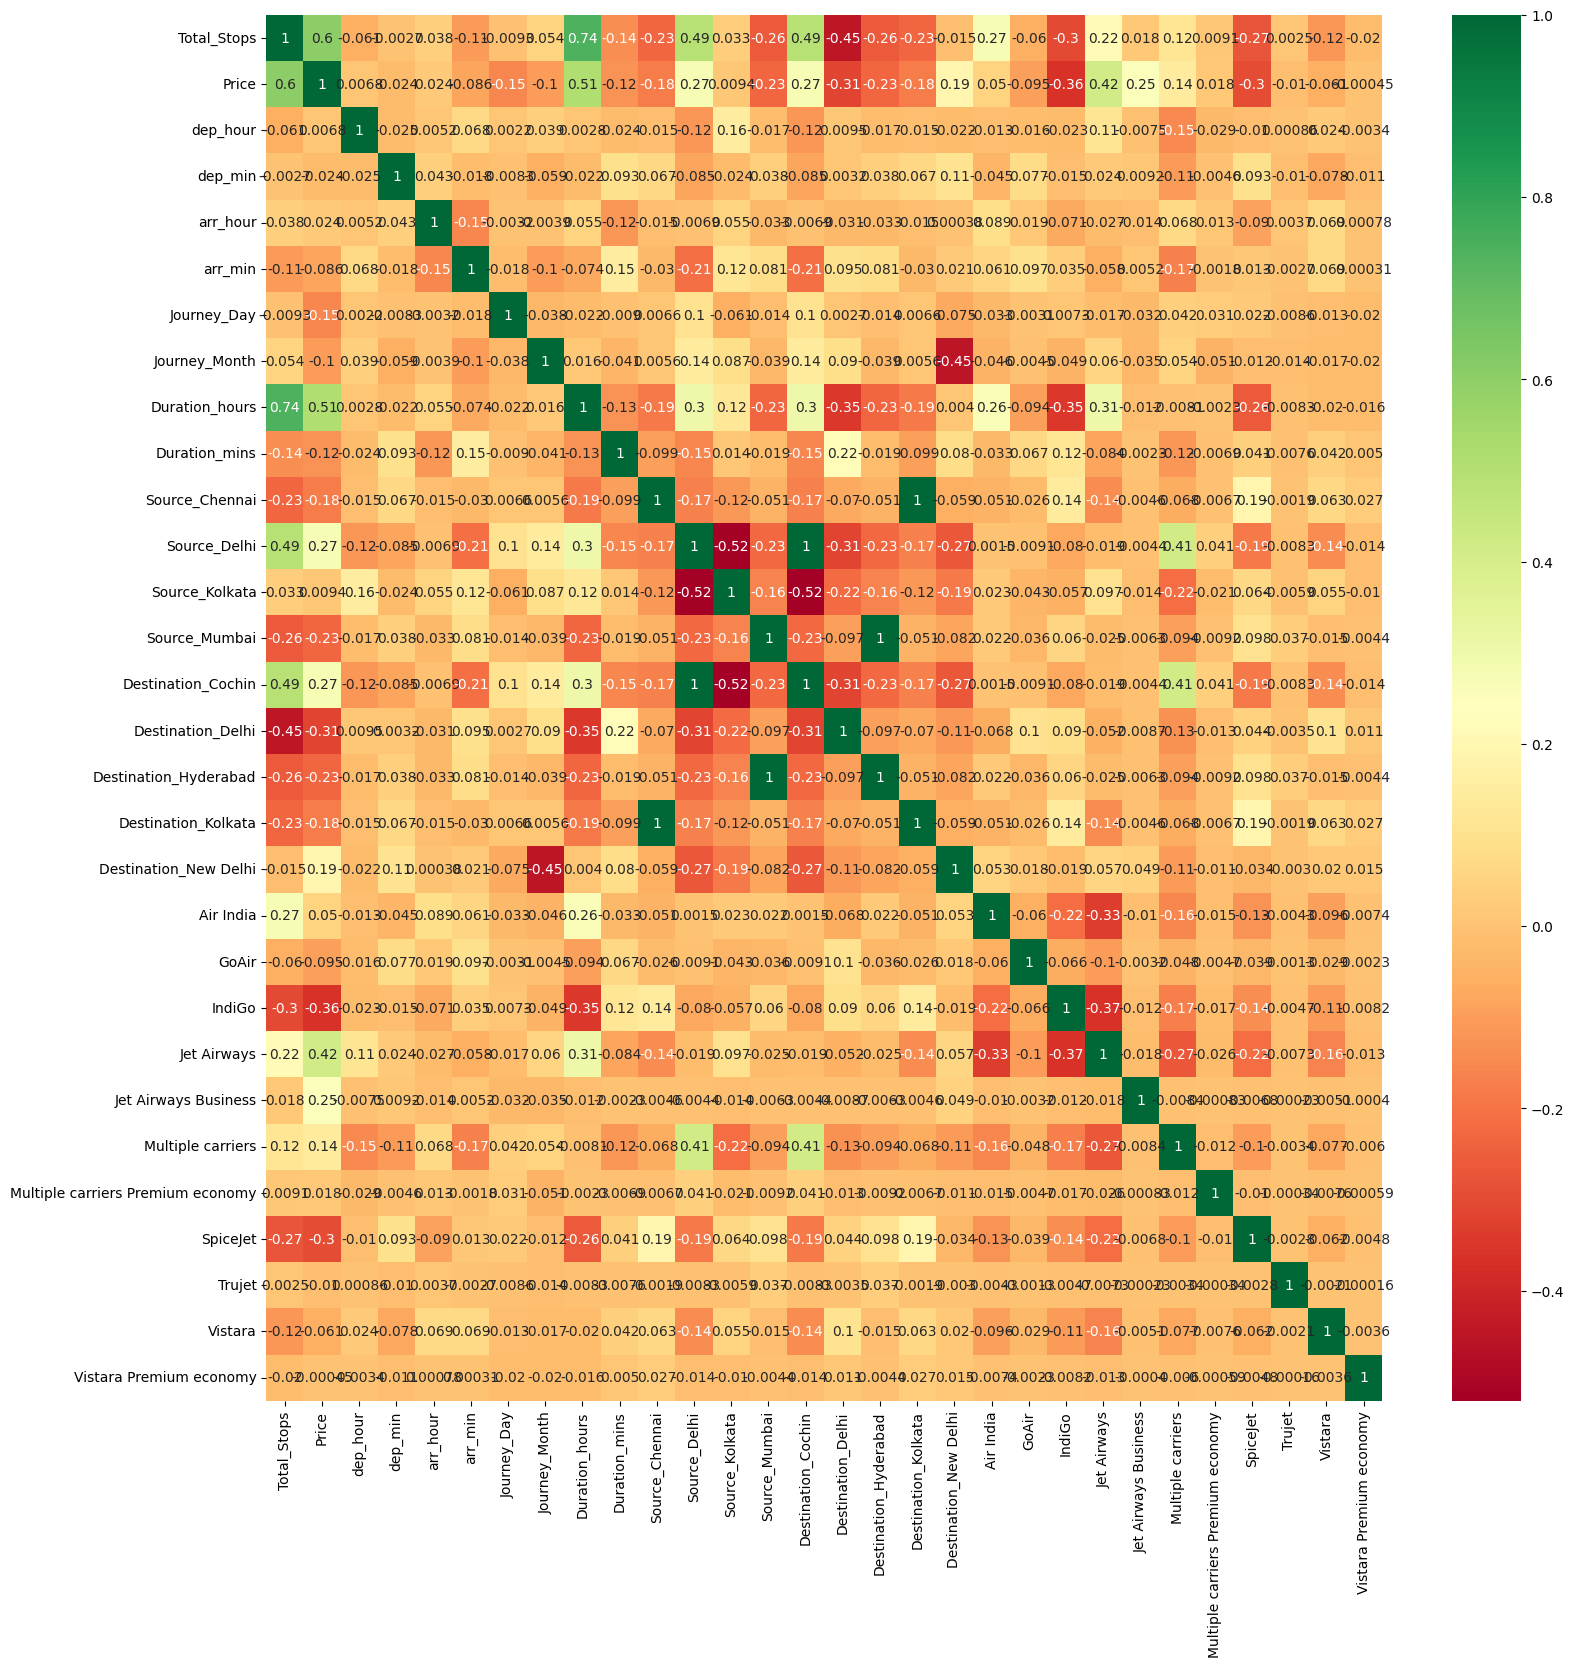

In [34]:
plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [35]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
print(selection.feature_importances_)

[1.32228929e-01 6.09158116e-01 1.43243738e-04 1.43204261e-04
 2.22312031e-04 1.46669779e-04 3.15149979e-03 2.11252076e-03
 8.68430918e-02 3.00670238e-04 1.91847773e-05 5.28651109e-03
 4.71451401e-04 2.14964301e-03 3.01911968e-03 9.16327828e-03
 1.65402434e-03 4.09200225e-05 5.12163364e-03 4.25674354e-04
 2.43120473e-05 5.57625314e-03 9.91485331e-02 3.01668010e-02
 2.84795081e-03 2.07182098e-06 2.26692581e-04 2.87556908e-09
 2.05104975e-04 5.79656621e-07]


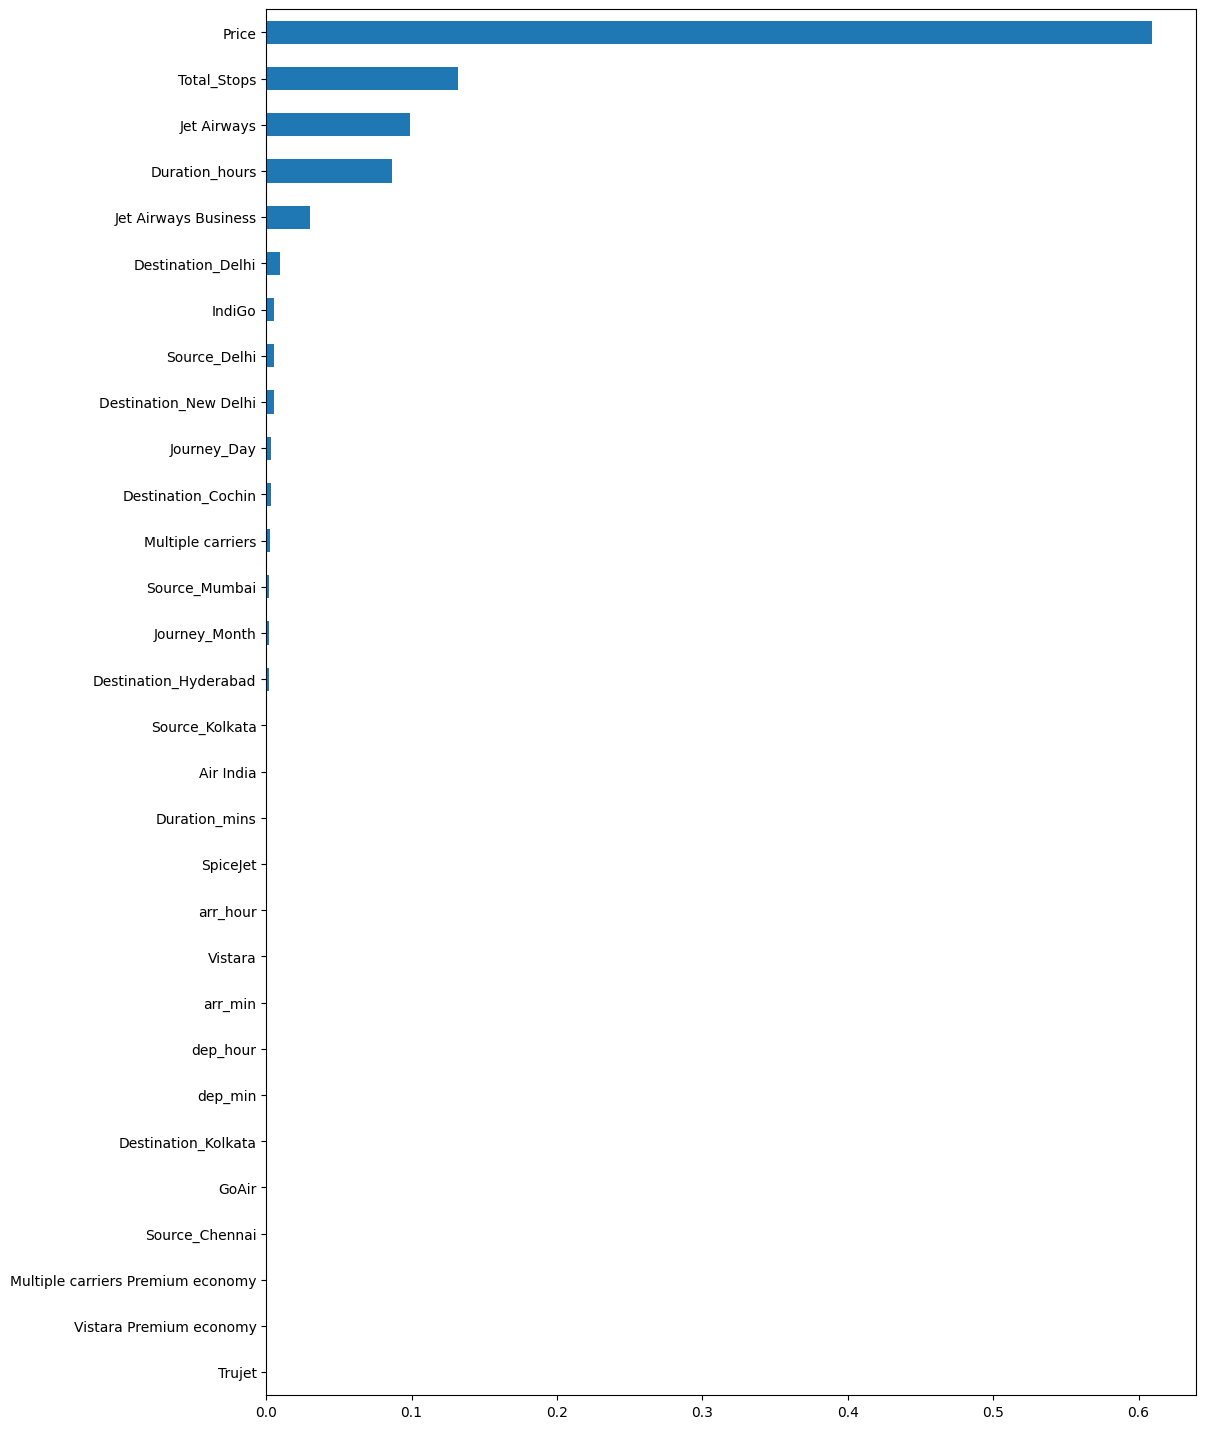

In [37]:
# Adjust figure size to fit all features properly
plt.figure(figsize=(12, 18))  # increase height to 18 to display all features

# Sort all features and plot their importances
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)

# Plot all features, instead of nlargest
feat_importances.sort_values(ascending=True).plot(kind='barh')

# Display the plot
plt.show()


# **Feature Scaling**

In [38]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

array([-1.22052384,  1.65425948, -0.23505036, -1.80042732, -0.8900573 ,
        1.23738294, -1.46749009, -0.97069753,  1.27900775, -0.19230993,
       -0.85918782, -0.60622728, -0.26419258, -0.85918782, -0.3664932 ,
       -0.26419258, -0.19230993,  3.23457051, -0.44291155, -0.13599841,
        2.05026937, -0.75047541, -0.0237056 , -0.3550595 , -0.03490515,
       -0.28795731, -0.00967551, -0.21666189, -0.01676004])

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7478, 29), (3205, 29), (7478,), (3205,))

# **ExtraTreesRegressor Model**

In [41]:
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [43]:
y_pred = selection.predict(x_test)

In [44]:
metrics(y_test, y_pred)

RMSE: 2088.4801608694984
R_Squared_Value: 0.7838606418599412


In [46]:
accuracy(y_test, y_pred)

86.32770342693826

# **Linear Regression Model**

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [49]:
y_pred = model.predict(x_test)

In [50]:
metrics(y_test, y_pred)

RMSE: 2839.5246819630684
R_Squared_Value: 0.6004561544808552


In [51]:
accuracy(y_test, y_pred)

75.31440885380378

C:\Users\siddhant\AppData\Local\Temp\ipykernel_5064\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


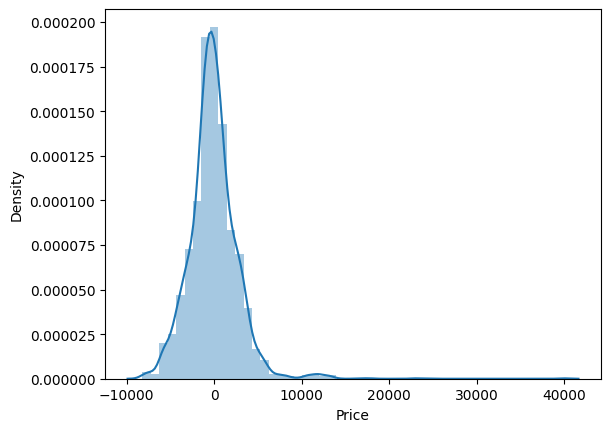

In [52]:
sns.distplot(y_test-y_pred)
plt.show()

# **XGBoost Model**

In [56]:
import xgboost as xg

ModuleNotFoundError: No module named 'xgboost'

In [55]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

NameError: name 'xg' is not defined

In [144]:
xgb_r.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:51:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [145]:
pred = xgb_r.predict(x_test)

In [146]:
from sklearn.metrics import mean_squared_error as MSE

In [147]:
metrics(y_test, pred)

RMSE: 2085.7278437151963
R_Squared_Value: 0.7844299477967203


In [148]:
accuracy(y_test, pred)

82.52904658688405

<ipython-input-149-4f857ce9c778>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


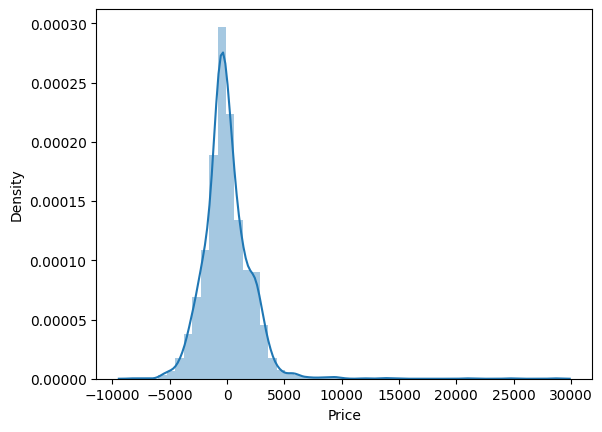

In [149]:
sns.distplot(y_test-pred)
plt.show()

# **Random Forest Model**

In [150]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3)

In [151]:
pred_rf = model_random_forest.predict(x_test)

In [152]:
metrics(y_test, pred_rf)

RMSE: 1909.2258491505515
R_Squared_Value: 0.8193708823144631


In [153]:
accuracy(y_test, pred_rf)

87.00819875525774

<ipython-input-154-4f857ce9c778>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


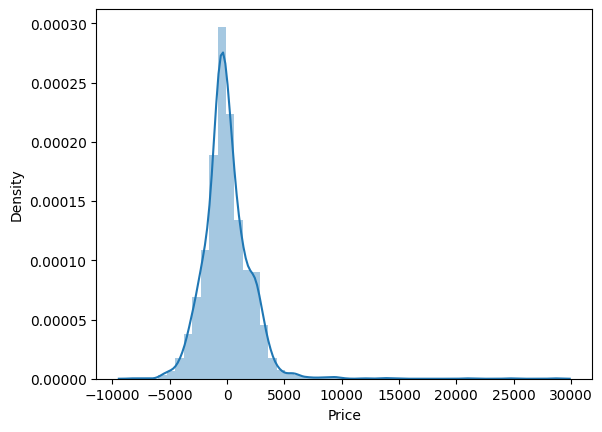

In [154]:
sns.distplot(y_test-pred)
plt.show()

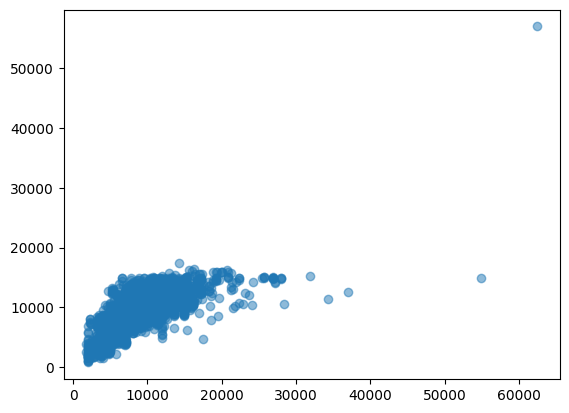

In [155]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

In [1]:
import pickle

# Save the trained Random Forest model
pickle.dump(model_random_forest, open("flight_price_model.pkl", "wb"))

print("Model saved successfully!")


NameError: name 'model_random_forest' is not defined